## Introduction


We are going to analyse the [Cyclistic Bike Share dataset](https://divvy-tripdata.s3.amazonaws.com/index.html)


The main question we are trying to answer with this analysis is : 

**What are the differences in usage between  members and casuals with cyclistic bikes ?**


In order to answer that business task we gonna try to find this metrics :
- What is the average ride length for casual and member ?
- Which day of the week causals and members prefer using the bikes ?
- Which bike do they prefer using ?
- Which Seasons casuals and members prefer using bikes ?
- which type of bikes do they prefer ?

## Exploring the dataset

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

In [2]:
df = pd.read_csv('All.csv', low_memory = False)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924073935,-87.646278381,41.93,-87.64,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.69048283333333,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


### dataset infos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719889 entries, 0 to 5719888
Data columns (total 13 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   start_station_id    object
 6   end_station_name    object
 7   end_station_id      object
 8   start_lat           object
 9   start_lng           object
 10  end_lat             object
 11  end_lng             object
 12  member_casual       object
dtypes: object(13)
memory usage: 567.3+ MB


## Cleaning

### Deleting unrelevant informations
To perform our analysis we need : 
 - the id to indentify the ride,
 - the type of bike used, 
 - the location (start station and ended station)
 - the duration (started time, ended time), 
 - the user (member or casual),

 So we have to delete all the rows that do not contains theses informations.


We gonna perfom some other cleaning steps like : 
- Drop duplicates rows
- Deleting copied headers from the mounth files

In [4]:
def clean_data(df):

    # Drop duplicate rows across all columns
    df = df.drop_duplicates()

    # deleting copied headers from the merged files
    df = df[df['ride_id'] != 'ride_id']

    # Drop rows where 'ride_id', 'rideable_type','start_station_id', 'end_station_id', 'member_casual' are null
    df = df.dropna(subset=['ride_id', 'rideable_type','start_station_id', 'end_station_id', 'member_casual'])

    # Reset the index after dropping the rows
    df = df.reset_index(drop=True)

    return df

# Apply function to df
df = clean_data(df)

# Display results
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924073935,-87.646278381,41.93,-87.64,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.69048283333333,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


### Formatting columns

In [5]:
def format_data(df):
    
    # Change column type to string for column: 'ride_id'
    df = df.astype({'ride_id': 'string'})
    
    # Change column type to string for column: 'end_station_name'
    df = df.astype({'end_station_name': 'string'})
    
    # Change column type to string for column: 'start_station_name'
    df = df.astype({'start_station_name': 'string'})
    
    # Change column type to datetime64[ns] for column: 'ended_at' & started_at
    df = df.astype({'ended_at': 'datetime64[ns]'})
    df = df.astype({'started_at': 'datetime64[ns]'})
    
    # Change lat and lon into float64
    df = df.astype({'start_lat': 'float64'})
    df = df.astype({'end_lng': 'float64'})
    df = df.astype({'end_lat': 'float64'})
    df = df.astype({'start_lng': 'float64'})
    
    return df

# running the function
df = format_data(df)

# Display results
df.dtypes

ride_id               string[python]
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    string[python]
start_station_id              object
end_station_name      string[python]
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

### Handling missing values
Replace all the numerical missing values with 0 and others with NaN.

In [6]:
# Replace NaN values based on column type
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(0, inplace=True)
    else:
        df[col].fillna(np.nan, inplace=True)

### Added columns

##### ride_length : the duration of each ride

In [7]:
# Create a column 'ride_lenght'
df['ride_length'] = pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])

 # display results
df[['ride_id', 'ride_length']]

,ride_id,ride_length
0,F96D5A74A3E41399,0 days 00:10:51
1,13CB7EB698CEDB88,0 days 00:08:29
2,BD88A2E670661CE5,0 days 00:13:14
3,C90792D034FED968,0 days 00:08:46
4,3397017529188E8A,0 days 00:15:19
...,...,...
4331818,F74DF9549B504A6B,0 days 00:02:13
4331819,BCDA66E761CC1029,0 days 00:03:35
4331820,D2CF330F9C266683,0 days 00:03:50
4331821,3829A0D1E00EE970,0 days 00:17:38


##### day_of_week : the weekday of each ride

In [8]:

# Create a new column 'day_of_week' that contains the day of the week for each ride
df['day_of_week'] = df['started_at'].dt.day_name()

# Display results
df[['ride_id', 'day_of_week']]

,ride_id,day_of_week
0,F96D5A74A3E41399,Saturday
1,13CB7EB698CEDB88,Tuesday
2,BD88A2E670661CE5,Monday
3,C90792D034FED968,Sunday
4,3397017529188E8A,Thursday
...,...,...
4331818,F74DF9549B504A6B,Thursday
4331819,BCDA66E761CC1029,Friday
4331820,D2CF330F9C266683,Tuesday
4331821,3829A0D1E00EE970,Saturday


##### season : in which season each ride was

In [9]:

# Define a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create the 'season' column
df['season'] = df['started_at'].dt.month.apply(get_season)

# Display results
df[['ride_id', 'season']]

,ride_id,season
0,F96D5A74A3E41399,Winter
1,13CB7EB698CEDB88,Winter
2,BD88A2E670661CE5,Winter
3,C90792D034FED968,Winter
4,3397017529188E8A,Winter
...,...,...
4331818,F74DF9549B504A6B,Winter
4331819,BCDA66E761CC1029,Winter
4331820,D2CF330F9C266683,Winter
4331821,3829A0D1E00EE970,Winter


##### month : in which month each ride was

In [10]:
# Create a new column 'ride_month' that extracts the month from 'started_at'
df['ride_month'] = df['started_at'].dt.month

# Display results
df[['ride_id', 'ride_month']]

,ride_id,ride_month
0,F96D5A74A3E41399,1
1,13CB7EB698CEDB88,1
2,BD88A2E670661CE5,1
3,C90792D034FED968,1
4,3397017529188E8A,1
...,...,...
4331818,F74DF9549B504A6B,12
4331819,BCDA66E761CC1029,12
4331820,D2CF330F9C266683,12
4331821,3829A0D1E00EE970,12


##### start position : the station location where the ride started

In [11]:
# create a column start_position
df['start_position'] = df['start_lat'].astype(str) + ',' + df['start_lng'].astype(str) 

# Display results
df[['ride_id', 'start_position']]


,ride_id,start_position
0,F96D5A74A3E41399,"41.924073935,-87.646278381"
1,13CB7EB698CEDB88,"41.799568,-87.594747"
2,BD88A2E670661CE5,"42.008571,-87.69048283333333"
3,C90792D034FED968,"41.799568,-87.594747"
4,3397017529188E8A,"41.799568,-87.594747"
...,...,...
4331818,F74DF9549B504A6B,"41.87470166666667,-87.64980383333334"
4331819,BCDA66E761CC1029,"41.874754,-87.649807"
4331820,D2CF330F9C266683,"41.874754,-87.649807"
4331821,3829A0D1E00EE970,"41.881395499999996,-87.67498383333333"


##### end position : the station location where the ride ended

In [12]:
# create a column end_position
df['end_position'] =df['end_lat'].astype(str) + ',' + df['end_lng'].astype(str)

# Display results
df[['ride_id', 'end_position']]

,ride_id,end_position
0,F96D5A74A3E41399,"41.93,-87.64"
1,13CB7EB698CEDB88,"41.809835,-87.599383"
2,BD88A2E670661CE5,"42.039742,-87.699413"
3,C90792D034FED968,"41.809835,-87.599383"
4,3397017529188E8A,"41.809835,-87.599383"
...,...,...
4331818,F74DF9549B504A6B,"41.87464,-87.65703"
4331819,BCDA66E761CC1029,"41.87464,-87.65703"
4331820,D2CF330F9C266683,"41.87464,-87.65703"
4331821,3829A0D1E00EE970,"41.88549170626906,-87.65228927135468"


##### route : combination of started and ended positions (this will help know the most used route by users).

In [13]:
# create the route column
df['route'] = df['start_position'].astype(str) + '/' + df['end_position'].astype(str)

# Display results
df[['ride_id', 'route']]

,ride_id,route
0,F96D5A74A3E41399,"41.924073935,-87.646278381/41.93,-87.64"
1,13CB7EB698CEDB88,"41.799568,-87.594747/41.809835,-87.599383"
2,BD88A2E670661CE5,"42.008571,-87.69048283333333/42.039742,-87.699413"
3,C90792D034FED968,"41.799568,-87.594747/41.809835,-87.599383"
4,3397017529188E8A,"41.799568,-87.594747/41.809835,-87.599383"
...,...,...
4331818,F74DF9549B504A6B,"41.87470166666667,-87.64980383333334/41.87464,..."
4331819,BCDA66E761CC1029,"41.874754,-87.649807/41.87464,-87.65703"
4331820,D2CF330F9C266683,"41.874754,-87.649807/41.87464,-87.65703"
4331821,3829A0D1E00EE970,"41.881395499999996,-87.67498383333333/41.88549..."


### Filters

#### All members rides filtered table

In [14]:
# filter the table to show only rows for members
df_filtered_member = df[df['member_casual'] == 'member']

#### All casuals rides filtered table

In [15]:
# filter the table to show only rows for casuals
df_filtered_casual = df[df['member_casual'] == 'casual']

## Metrics

#### The average ride length for casuals and riders

In [16]:
# Average length for members
avg_member = df[df['member_casual'] == 'member']['ride_length'].mean()

# Average length for casual
avg_casual = df[df['member_casual'] == 'casual']['ride_length'].mean()

# Max ride length for casuals 
Ride_casual = df[df['member_casual'] == 'casual']['ride_length'].max()
Max_ride_casual = df.loc[df['ride_length'] == Ride_casual][['ride_id', 'started_at', 'ended_at', 'ride_length']]

# Max ride length for members 
Ride_member = df[df['member_casual'] == 'member']['ride_length'].max()
Max_ride_member = df.loc[df['ride_length'] == Ride_member][['ride_id', 'started_at', 'ended_at', 'ride_length']]


# printing results
print("RESULTS :")
print('The average ride length for members is :', avg_member) 
print('The average ride length for casuals is :', avg_casual)

RESULTS :
The average ride length for members is : 0 days 00:12:07.856448150
The average ride length for casuals is : 0 days 00:22:56.262636001


###### Observations
We can see that casuals uses bikes more often for longs rides.

This observation can also be confirmed with the difference between the max ride length for casuals and members 

In [17]:
print('MAX RIDE LENGTH FOR CASUALS :', Ride_casual)
print('MAX RIDE LENGTH FOR MEMBERS :', Ride_member)

MAX RIDE LENGTH FOR CASUALS : 8 days 10:16:18
MAX RIDE LENGTH FOR MEMBERS : 1 days 00:57:52


#### Day of week with the most activity

In [18]:
# calculate the mode for casuals
mode_day_of_week_casual = df[df['member_casual'] == 'casual']['day_of_week'].mode()[0]

# calcualte the mode for memebers
mode_day_of_week_member = df[df['member_casual'] == 'member']['day_of_week'].mode()[0]

print("RESULTS :")
print('The prefered day for members is :', mode_day_of_week_member, ',while casual users prefer using the bikes on', mode_day_of_week_casual)


RESULTS :
The prefered day for members is : Wednesday ,while casual users prefer using the bikes on Saturday


###### Observations
We can suppose that members prefer ti use bikes on wednesday maybe because they go to work with it and this can explain why they have a membership
where casuals have the most interest on weekend when have to go shopping for example.

#### Season have the most activity

In [19]:
# calculate the mode of season
mode_season_casual = df[df['member_casual'] == "casual"]['season'].mode()[0]
mode_season_member = df[df['member_casual'] == "member"]['season'].mode()[0]

print("RESULTS :")
print ('members prefered season : ', mode_season_member)
print ( "casuals prefered season : " ,mode_season_casual)

RESULTS :
members prefered season :  Summer
casuals prefered season :  Summer


###### Observations
Both , casuals and members prefer to use the bikes on summer.


#### Most used routes per user type

##### Most used route by members 

In [20]:
# filter df to keep only members rides
members_rides = df[df['member_casual'] == "member"][['ride_id', 'route','ride_length']]

# Group by 'route' and apply different aggregation functions, renaming columns
ride_count_members_rides = members_rides.groupby('route').agg(
    ride_count=('ride_id', 'count'),      
    avg_ride_length=('ride_length', 'mean')
)

# return the route with the most rides 
most_used_route_member = ride_count_members_rides.sort_values(by='ride_count', ascending = False).head(1)

# Display result
most_used_route_member

,ride_count,avg_ride_length
route,,
"41.78509714636,-87.6010727606/41.791478,-87.599861",4366,0 days 00:04:19.061612459


###### Itinerary google maps

A route used by students leaving the university to go to the University Community Service Center

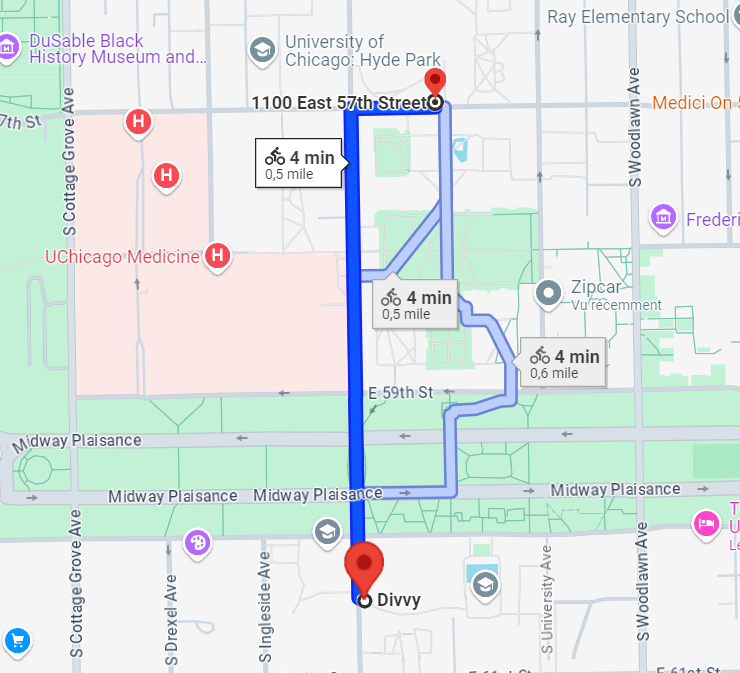

##### Most used route by casuals

In [21]:
# filter df to keep only casuals rides
casuals_rides = df[df['member_casual'] == "casual"][['ride_id', 'route','ride_length']]

# Group by 'route' and apply different aggregation functions, renaming columns
ride_count_casuals_rides = casuals_rides.groupby('route').agg(
    ride_count=('ride_id', 'count'),      
    avg_ride_length=('ride_length', 'mean')
)

# return the route with the most rides 
most_used_route_casual = ride_count_casuals_rides.sort_values(by='ride_count', ascending = False).head(1)

# Display result
most_used_route_casual

,ride_count,avg_ride_length
route,,
"41.892278,-87.612043/41.892278,-87.612043",6812,0 days 00:41:26.686435701


###### Itinerary google maps

Users tend to return the bike to the same station, given the Google maps area it looks like a fairly frequent area with restaurants and a children's museum not far away.


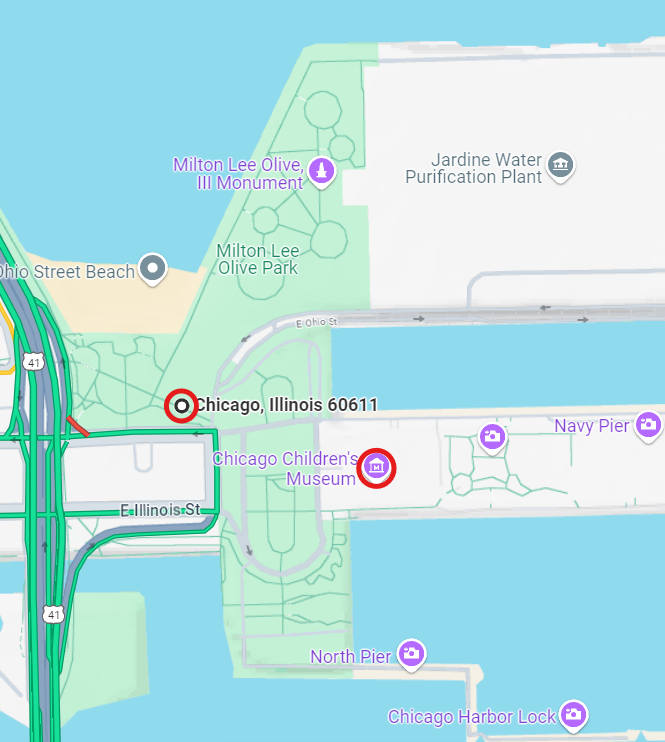

## Visualizations

##### Numbers of rides per season

###### Pivot table

In [22]:
Pivot_table_num_rides_total_season = pd.pivot_table(
    #values='ColumnOne',
    data = df,
    index = ['season'],
    columns= ['member_casual'],
    aggfunc={'ride_id' : 'count'}
    )

###### Variables

In [23]:
var_num_rides_season_member = Pivot_table_num_rides_total_season[('ride_id', 'member')].values
var_num_rides_season_casual = Pivot_table_num_rides_total_season[('ride_id', 'casual')].values
var_season_total = Pivot_table_num_rides_total_season.index.values

###### Chart

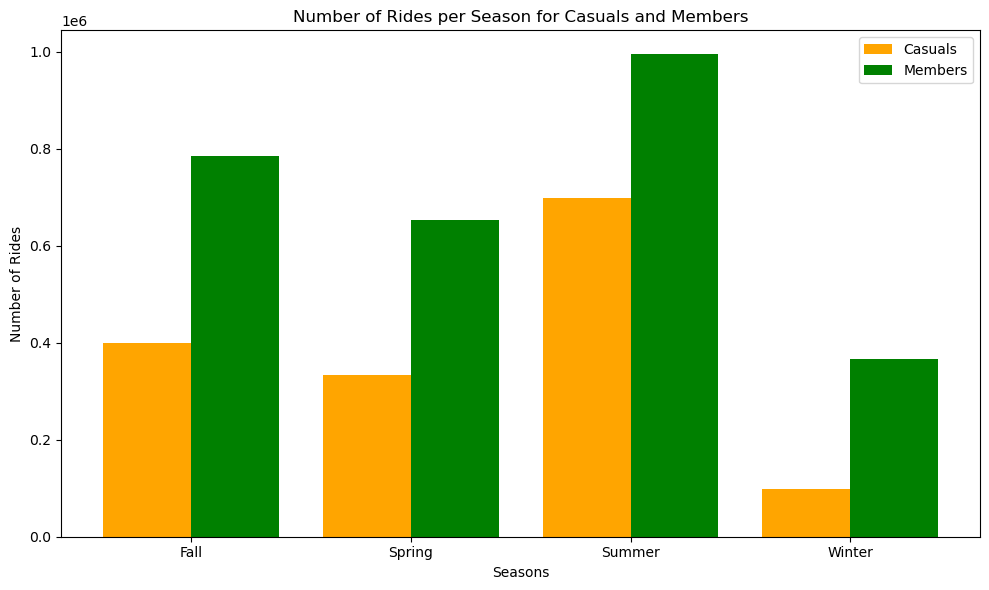

ride_id        
member_casual  casual  member
season                       
Fall           399361  785853
Spring         334369  653502
Summer         699060  994691
Winter          99083  365904

In [24]:
# define bar width and range
bar_width = 0.40
index_season = range(len(var_season_total))
yrange = range(len(var_season_total))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6) )

# Set bar chart for number of rides (members)
bars1 = ax.bar(index_season, var_num_rides_season_casual, bar_width, label='Casuals', color='orange')

# Set bar chart for number of rides (members)
bars2 = ax.bar([i + bar_width for i in index_season], var_num_rides_season_member, bar_width, label='Members', color='green')

# Title and tags
ax.set_xlabel('Seasons')
ax.set_ylabel('Number of Rides')
ax.set_title('Number of Rides per Season for Casuals and Members')
ax.set_xticks([i + bar_width / 2 for i in index_season])
ax.set_xticklabels(var_season_total)
ax.legend()

# Show the plot 
plt.tight_layout()
plt.show()
Pivot_table_num_rides_total_season

##### Average ride duration per season

###### Pivot table

In [25]:
Pivot_table_avg_ride_total = pd.pivot_table(
    #values='ColumnOne',
    data = df, 
    index = ['season'],
    columns= ['member_casual'],
    aggfunc={'ride_length' : 'mean'}
    )

###### Variables

In [26]:
var_avg_ride_season_member = Pivot_table_avg_ride_total[('ride_length', 'member')].values
var_avg_ride_season_casual = Pivot_table_avg_ride_total[('ride_length', 'casual')].values
var_season_total = Pivot_table_avg_ride_total.index.values

###### Chart

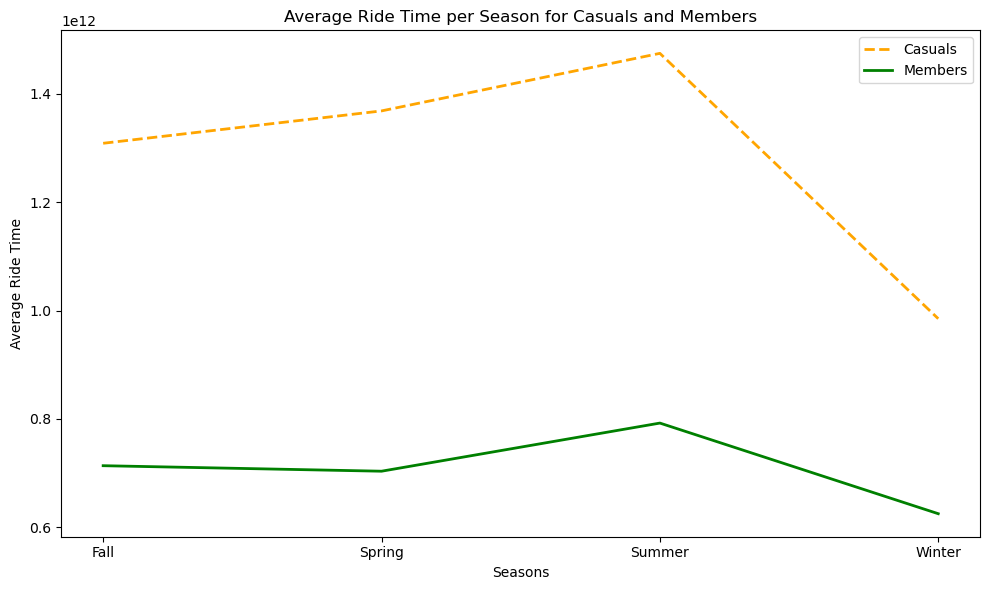

Average ride length per member 



ride_length                          
member_casual                    casual                    member
season                                                           
Fall          0 days 00:21:48.477229874 0 days 00:11:53.871892071
Spring        0 days 00:22:48.168858357 0 days 00:11:43.709566305
Summer        0 days 00:24:34.321790690 0 days 00:13:12.478273152
Winter        0 days 00:16:24.953564183 0 days 00:10:25.346208295

In [27]:
# define bar width and range
bar_width = 0.40
index_season_1 = range(len(var_season_total))
yrange = range(len(var_season_total))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for average ride time for casuals and members
ax.plot(index_season_1, var_avg_ride_season_casual, label='Casuals', color='orange', linestyle='--', linewidth=2)
ax.plot(index_season_1, var_avg_ride_season_member, label='Members', color='green', linestyle='-', linewidth=2)

# Title and tags
ax.set_xlabel('Seasons')
ax.set_ylabel('Average Ride Time')
ax.set_title('Average Ride Time per Season for Casuals and Members')
ax.set_xticks(index_season_1)
ax.set_xticklabels(var_season_total)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
print('Average ride length per member \n')
Pivot_table_avg_ride_total

##### Numbers of rides per day of week

###### Pivot table

In [28]:
Pivot_table_num_rides_total_day = pd.pivot_table(
    #values='ColumnOne',
    data = df,
    index = ['day_of_week'],
    columns= ['member_casual'],
    aggfunc={'ride_id' : 'count'}
    )

Pivot_table_num_rides_total_day

ride_id        
member_casual  casual  member
day_of_week                  
Friday         227883  400507
Monday         175423  386697
Saturday       310186  350645
Sunday         254781  307870
Thursday       198952  452660
Tuesday        181552  448850
Wednesday      183096  452721

###### Variables

In [29]:
var_num_rides_day_member = Pivot_table_num_rides_total_day[('ride_id', 'member')].values
var_num_rides_day_casual = Pivot_table_num_rides_total_day[('ride_id', 'casual')].values
var_day_total = Pivot_table_num_rides_total_day.index.values

###### Chart

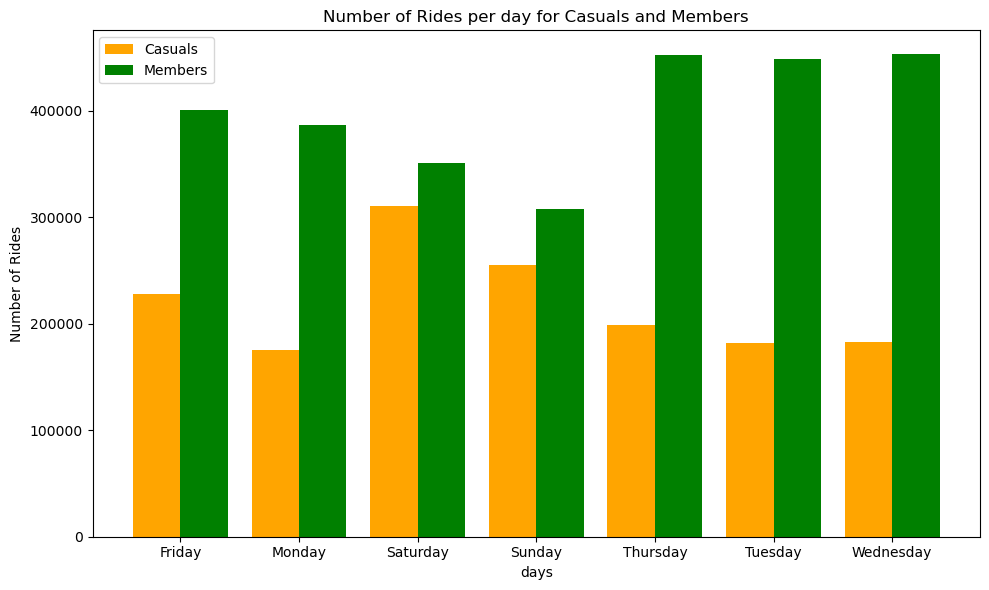

ride_id        
member_casual  casual  member
day_of_week                  
Friday         227883  400507
Monday         175423  386697
Saturday       310186  350645
Sunday         254781  307870
Thursday       198952  452660
Tuesday        181552  448850
Wednesday      183096  452721

In [30]:

# define bar width and range
bar_width = 0.40
index_day = range(len(var_day_total))
yrange = range(len(var_day_total))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar chart for number of rides (members)
bars1 = ax.bar(index_day, var_num_rides_day_casual, bar_width, label='Casuals', color='orange')

# Set bar chart for number of rides (members)
bars2 = ax.bar([i + bar_width for i in index_day], var_num_rides_day_member, bar_width, label='Members', color='green')

# Title and tags
ax.set_xlabel('days')
ax.set_ylabel('Number of Rides')
ax.set_title('Number of Rides per day for Casuals and Members')
ax.set_xticks([i + bar_width / 2 for i in index_day])
ax.set_xticklabels(var_day_total)
ax.legend()

# Show the plot 
plt.tight_layout()
plt.show()

Pivot_table_num_rides_total_day

###### Observations
We can highlight the the casuals tends to use the bikes more often on the weekend and that members have more activity on weekdays.

##### Average ride duration per day

###### Pivot table

In [31]:
Pivot_table_avg_ride_total_day = pd.pivot_table(
    #values='ColumnOne',
    data = df, 
    index = ['day_of_week'],
    columns= ['member_casual'],
    aggfunc={'ride_length' : 'mean'}
    )

Pivot_table_avg_ride_total_day

ride_length                          
member_casual                    casual                    member
day_of_week                                                      
Friday        0 days 00:22:19.063659860 0 days 00:12:02.346812914
Monday        0 days 00:22:32.012843241 0 days 00:11:32.978921481
Saturday      0 days 00:25:55.187942073 0 days 00:13:34.966401916
Sunday        0 days 00:26:33.679642516 0 days 00:13:36.639731055
Thursday      0 days 00:19:59.921765048 0 days 00:11:36.090926965
Tuesday       0 days 00:20:30.889678990 0 days 00:11:38.886298317
Wednesday     0 days 00:19:35.893749726 0 days 00:11:35.159789362

###### Variables

In [32]:
var_avg_ride_day_member = Pivot_table_avg_ride_total_day[('ride_length', 'member')].values
var_avg_ride_day_casual = Pivot_table_avg_ride_total_day[('ride_length', 'casual')].values
var_day_total = Pivot_table_avg_ride_total_day.index.values

###### Chart

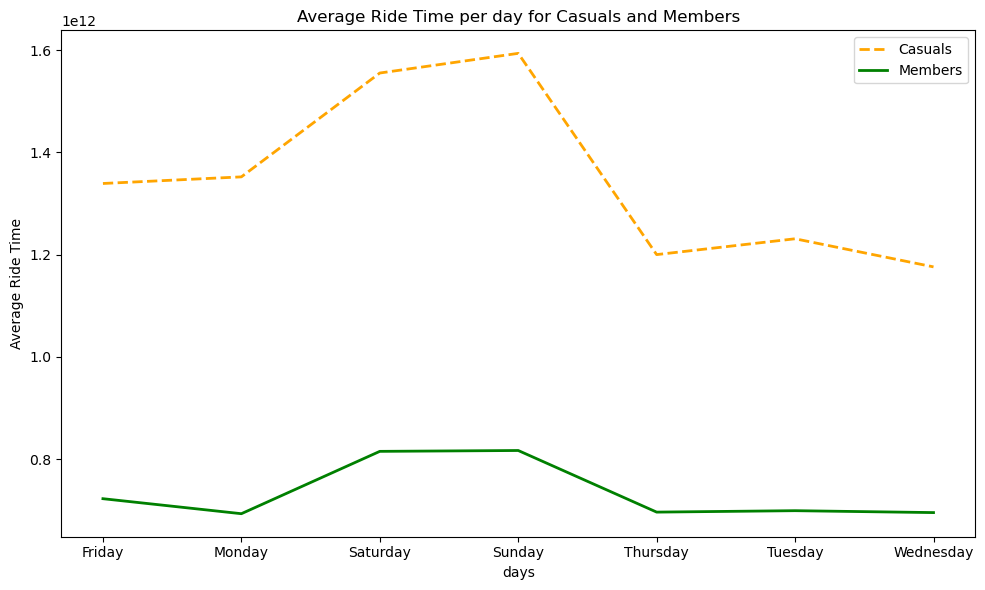

ride_length                          
member_casual                    casual                    member
day_of_week                                                      
Friday        0 days 00:22:19.063659860 0 days 00:12:02.346812914
Monday        0 days 00:22:32.012843241 0 days 00:11:32.978921481
Saturday      0 days 00:25:55.187942073 0 days 00:13:34.966401916
Sunday        0 days 00:26:33.679642516 0 days 00:13:36.639731055
Thursday      0 days 00:19:59.921765048 0 days 00:11:36.090926965
Tuesday       0 days 00:20:30.889678990 0 days 00:11:38.886298317
Wednesday     0 days 00:19:35.893749726 0 days 00:11:35.159789362

In [33]:
# define bar width and range
bar_width = 0.40
index_day_1 = range(len(var_day_total))
yrange = range(len(var_day_total))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for average ride time for casuals and members
ax.plot(index_day_1, var_avg_ride_day_casual, label='Casuals', color='orange', linestyle='--', linewidth=2)
ax.plot(index_day_1, var_avg_ride_day_member, label='Members', color='green', linestyle='-', linewidth=2)

# Title and tags
ax.set_xlabel('days')
ax.set_ylabel('Average Ride Time')
ax.set_title('Average Ride Time per day for Casuals and Members')
ax.set_xticks(index_day_1)
ax.set_xticklabels(var_day_total)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
Pivot_table_avg_ride_total_day


###### Observations
Casuals are more likely to use bikes for long periods of time.
We notice a peak for both casuals and members during Saturday and Sunday.

##### Numbers of rides per bike type

###### Pivot table

In [34]:
Pivot_table_num_rides_rideable_bike = pd.pivot_table(
    #values='ColumnOne',
    data = df, 
    index = ['rideable_type'],
    columns= ['member_casual'],
    aggfunc={'ride_id' : 'count'}
    )

Pivot_table_num_rides_rideable_bike

ride_id           
member_casual    casual     member
rideable_type                     
classic_bike   873025.0  1817719.0
docked_bike     76240.0        NaN
electric_bike  582608.0   982231.0

###### Variables

In [35]:
var_num_rides_rideable_type_member = Pivot_table_num_rides_rideable_bike[('ride_id', 'member')].values
var_num_rides_rideable_type_casual = Pivot_table_num_rides_rideable_bike[('ride_id', 'casual')].values
var_rideable_type = Pivot_table_num_rides_rideable_bike.index.values

###### Chart

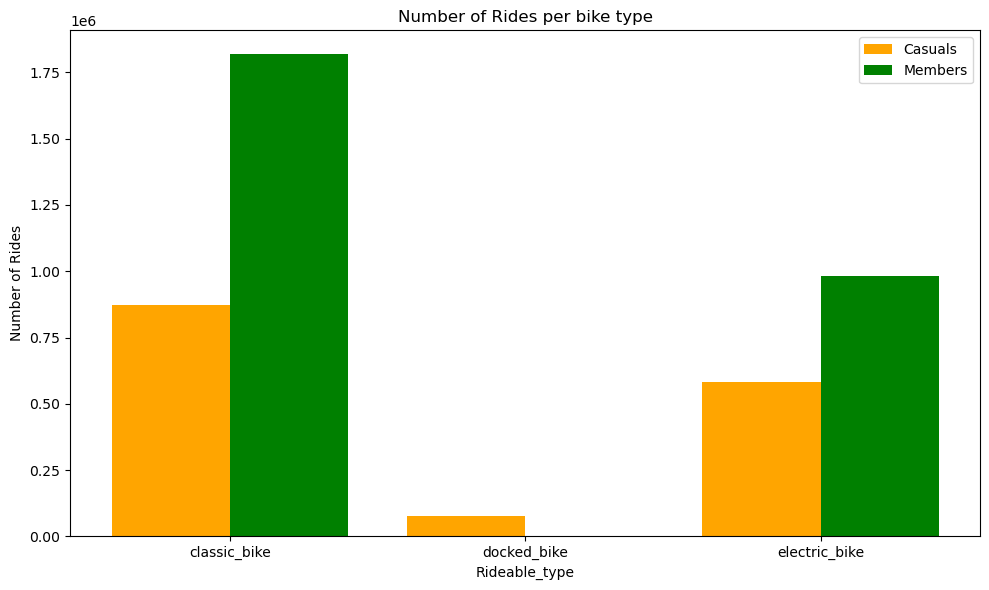

Numbers of rides per bike type 



ride_id           
member_casual    casual     member
rideable_type                     
classic_bike   873025.0  1817719.0
docked_bike     76240.0        NaN
electric_bike  582608.0   982231.0

In [36]:
# define bar width and range
bar_width = 0.40
index_rideable = range(len(var_rideable_type))
yrange = range(len(var_rideable_type))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar chart for number of rides (members)
bars1 = ax.bar(index_rideable, var_num_rides_rideable_type_casual, bar_width, label='Casuals', color='orange')

# Set bar chart for number of rides (members)
bars2 = ax.bar([i + bar_width for i in index_rideable], var_num_rides_rideable_type_member, bar_width, label='Members', color='green')

# Title and tags
ax.set_xlabel('Rideable_type')
ax.set_ylabel('Number of Rides')
ax.set_title('Number of Rides per bike type')
ax.set_xticks([i + bar_width / 2 for i in index_rideable])
ax.set_xticklabels(var_rideable_type)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
print('Numbers of rides per bike type \n')
Pivot_table_num_rides_rideable_bike



## Appendix

#### Ride_length distribution

###### variables

In [37]:
# Number ride under 5min for Members
var_member_ride_under_five = df[(df['ride_length'] < pd.Timedelta(minutes=5)) & (df['member_casual'] == 'member')]['ride_id'].count()

# Number ride under 5min for casual
var_casual_ride_under_five = df[(df['ride_length'] < pd.Timedelta(minutes=5)) & (df['member_casual'] == 'casual')]['ride_id'].count()

# Number ride between 5 and 30 (member)
var_member_ride_between_5_30 = df[(df['ride_length'] > pd.Timedelta(minutes=5)) & (df['ride_length'] < pd.Timedelta(minutes=30)) & (df['member_casual'] == 'member')]['ride_id'].count()

# Number rides between 5 and 30 (casual)
var_casual_ride_between_5_30 = df[(df['ride_length'] > pd.Timedelta(minutes=5)) & (df['ride_length'] < pd.Timedelta(minutes=30)) & (df['member_casual'] == 'casual')]['ride_id'].count()

# Number rides over 30 (member)
var_member_ride_over_oneH = df[(df['ride_length'] > pd.Timedelta(minutes=60)) & (df['member_casual'] == 'member')]['ride_id'].count()

# Number rides over 30 (casual)
var_casual_ride_over_oneH = df[(df['ride_length'] > pd.Timedelta(minutes=60)) & (df['member_casual'] == 'casual')]['ride_id'].count()

###### Table

In [38]:
# Create a DataFrame with the results
ride_length_distribution = pd.DataFrame({
    'member': [var_member_ride_under_five, var_member_ride_between_5_30, var_member_ride_over_oneH],
    'casual': [var_casual_ride_under_five, var_casual_ride_between_5_30, var_casual_ride_over_oneH]
}, index=['under 5 min', 'between 5 and 30min', 'over 1 hour'])

In [39]:
ride_length_distribution

,member,casual
under 5 min,689193,206771
between 5 and 30min,1944165,1038668
over 1 hour,16620,99878


In [40]:
member_dist= ride_length_distribution['member'].values
casual_dist = ride_length_distribution['casual'].values
index_distribution = ride_length_distribution.index.values

###### Chart

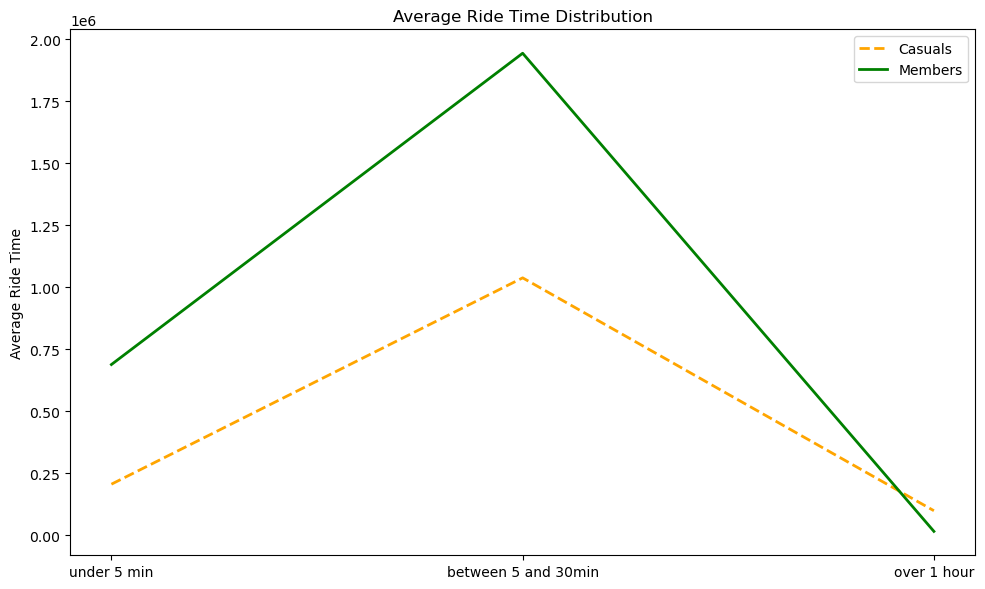

Average ride length per member 



ride_length                          
member_casual                    casual                    member
season                                                           
Fall          0 days 00:21:48.477229874 0 days 00:11:53.871892071
Spring        0 days 00:22:48.168858357 0 days 00:11:43.709566305
Summer        0 days 00:24:34.321790690 0 days 00:13:12.478273152
Winter        0 days 00:16:24.953564183 0 days 00:10:25.346208295

In [41]:
# define bar width and range
bar_width = 0.40
indexdist = range(len(index_distribution))
yrange = range(len(index_distribution))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for average ride time for casuals and members
ax.plot(indexdist, casual_dist, label='Casuals', color='orange', linestyle='--', linewidth=2)
ax.plot(indexdist, member_dist, label='Members', color='green', linestyle='-', linewidth=2)

# Title and tags
ax.set_xlabel('')
ax.set_ylabel('Average Ride Time')
ax.set_title('Average Ride Time Distribution')
ax.set_xticks(indexdist)
ax.set_xticklabels(index_distribution)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
print('Average ride length per member \n')
Pivot_table_avg_ride_total

#### Rides distribution over the year

<Axes: title={'center': 'Rides distribution over the year'}, xlabel='ride_month'>

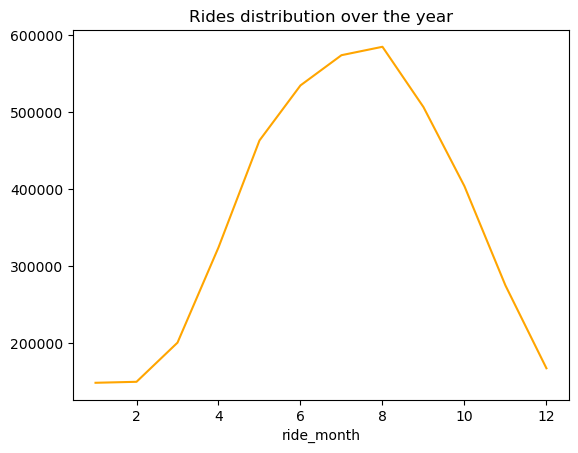

In [42]:
df.groupby(by = 'ride_month')['ride_id'].count().plot.line(color='orange', title = 'Rides distribution over the year')